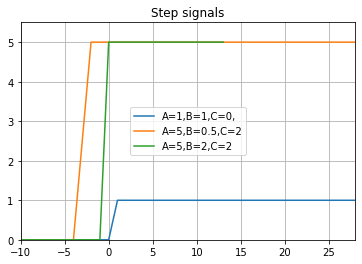

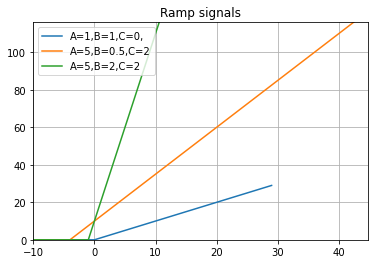

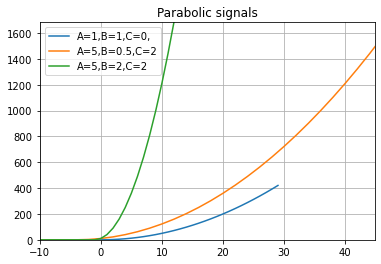

In [670]:
# Part A: Basic Signals - Step, Ramp and Parabolic

from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-30,30)


def step(t):
    if type(t) == np.int32 or type(t) == int or type(t) ==np.float64:
        if t>0:
            return 1
        else:
            return 0
    else:
        y = np.zeros(len(t))
        for i in range(len(t)):
            if t[i]>0:
                y[i] = 1
        return y

def ramp(t):
    if type(t) == np.int32 or type(t) == int or type(t) ==np.float64:
        if t>0:
            return t
        else:
            return 0
    else:
        y = np.zeros(len(t))
        for i in range(len(y)):
            if t[i]>0:
                y[i] = t[i]
        return y

def parabolic(t):
    if type(t) == np.int32 or type(t) == int or type(t) ==np.float64:
        if t>0:
            return (t**2)/2
        else:
            return 0
    else:
        y = np.zeros(len(t))
        for i in range(len(t)):
            if t[i]>0:
                y[i] = (t[i]**2)/2
        return y
    
    
def time_scale(arr, M,t):
    n = len(arr)
    to = min(t)
    t1 = max(t)+1
    if M < 1:
        M = int(1/M)
        t = np.arange(M*to,M*t1+1)
        return np.interp(np.linspace(0, n, M*n+1), np.arange(n), arr) , t
    
    if M > 1:
        arr = arr[0:int(np.floor(len(arr)/M))*M]
        arr = arr.reshape((int(np.floor(len(arr)/M)),M))
        arr = arr[:,0]
        t = np.arange(int(to/M),int(t1/M))
        return arr,t
    else:
        return arr,t
    
def amp_scale(y,a):
    return y*a

def time_rev(y):
    y = np.flipud(y) 
    return y

def modify(y,t,a,b,c,rev):
    t = t-c
    y,t = time_scale(y,b,t)
    if rev ==1:
        y = time_rev(y)
    y = amp_scale(y,a)
    return y,t   

A = [5,5]
B = [0.5,2]
C = [2,2]


plt.figure(1)
ys = step(t)
ys1,ts1 = modify(ys,t,A[0],B[0],C[0],0)
ys2,ts2 = modify(ys,t,A[1],B[1],C[1],0)
plt.xlim(-10,0.5*max(max(t),max(ts1),max(ts2)))
plt.ylim(0,1.1*max(max(ys),max(ys1),max(ys2)))
plt.grid("on")
plt.title("Step signals")
plt.plot(t,ys)
plt.plot(ts1,ys1)
plt.plot(ts2,ys2)
plt.legend(["A=1,B=1,C=0,","A=5,B=0.5,C=2","A=5,B=2,C=2"], loc ="center") 

plt.figure(2)
yr = ramp(t)
yr1,tr1 = modify(yr,t,A[0],B[0],C[0],0)
yr2,tr2 = modify(yr,t,A[1],B[1],C[1],0)
plt.xlim(-10,0.8*max(max(t),max(tr1),max(tr2)))
plt.ylim(0,0.8*max(max(yr),max(yr1),max(yr2)))
plt.grid("on")
plt.title("Ramp signals")
plt.plot(t,yr)
plt.plot(tr1,yr1)
plt.plot(tr2,yr2)
plt.legend(["A=1,B=1,C=0,","A=5,B=0.5,C=2","A=5,B=2,C=2"], loc ="upper left") 

plt.figure(3)
yp = parabolic(t)
yp1,tp1 = modify(yp,t,A[0],B[0],C[0],0)
yp2,tp2 = modify(yp,t,A[1],B[1],C[1],0)
plt.xlim(-10,0.8*max(max(t),max(tp1),max(tp2)))
plt.ylim(0,0.8*max(max(yp),max(yp1),max(yp2)))
plt.grid("on")
plt.title("Parabolic signals")
plt.plot(t,yp)
plt.plot(tp1,yp1)
plt.plot(tp2,yp2)
plt.legend(["A=1,B=1,C=0,","A=5,B=0.5,C=2","A=5,B=2,C=2"], loc ="upper left") 
   

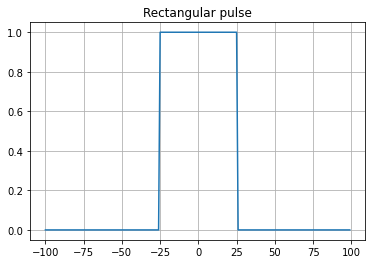

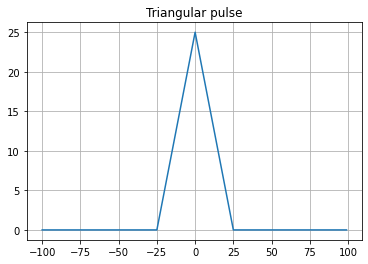

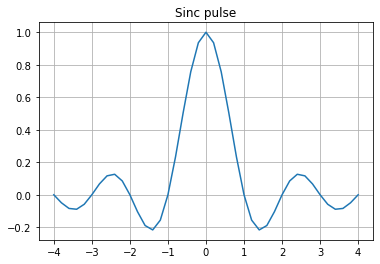

In [588]:
# Part A - Rectangular, Triangular and Sinc

t = np.arange(-100,100)
tao = 50

def rect(t,tao):
    y = np.zeros(len(t))
    for i in range(len(t)):
        if np.abs(t[i]) > tao/2:
            y[i] = 0
        else:
            y[i] = 1
    return y

def tri(t,tao):
    y = np.zeros(len(t))
    for i in range(len(t)):
        if np.abs(t[i]) > tao/2:
            y[i] = 0
        else:
            y[i] = tao/2 - np.abs(t[i])
    return y

figure(1)
plt.title("Rectangular pulse")
plt.grid("on")
plt.plot(t,rect(t,tao))
figure(2)
plt.title("Triangular pulse")
plt.plot(t,tri(t,tao))
plt.grid("on")
figure(3)
plt.title("Sinc pulse")
t1 = np.linspace(-4, 4, 41)
plt.grid("on")
plt.plot(t1,np.sinc(t1))
plt.show()

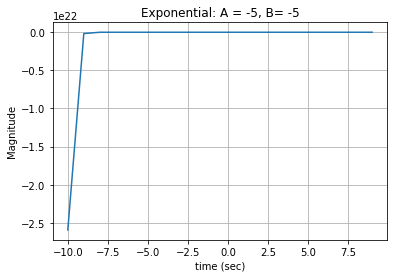

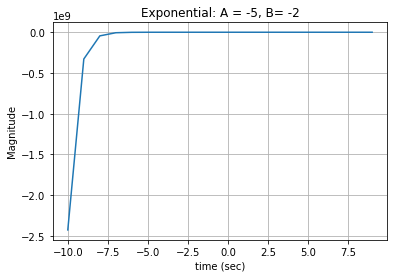

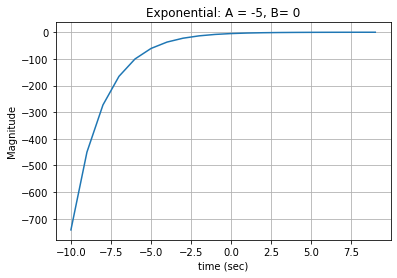

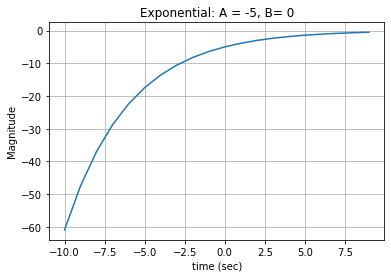

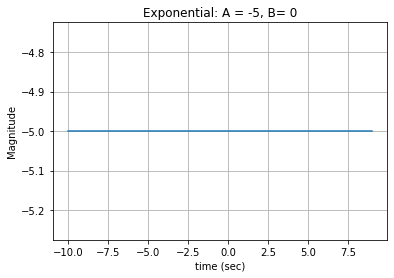

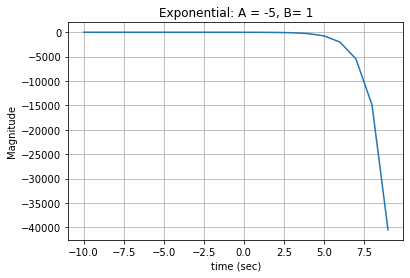

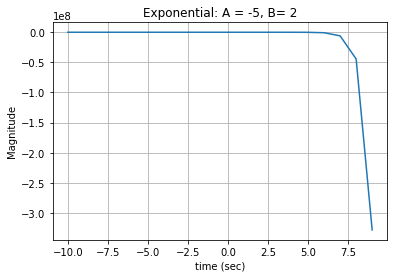

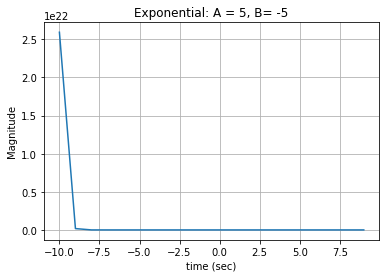

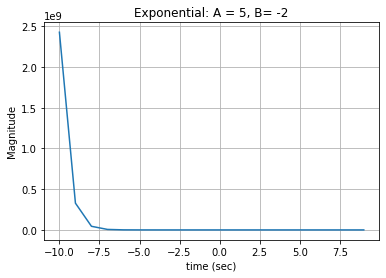

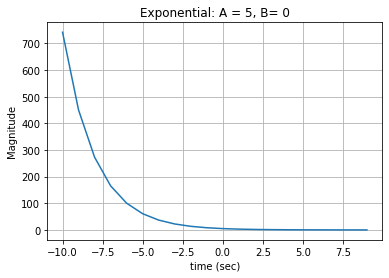

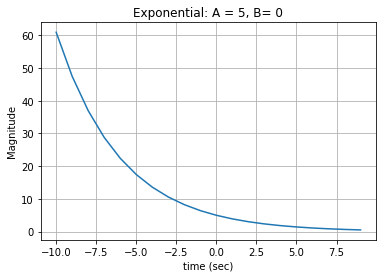

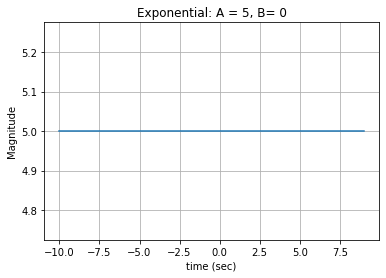

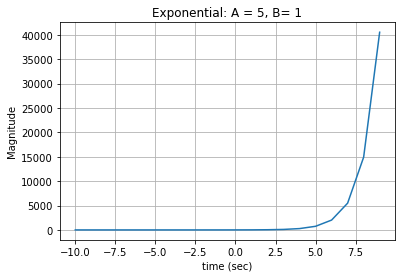

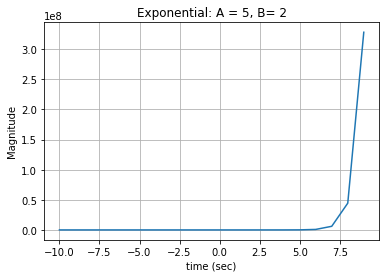

In [69]:
# Part B: Exponentials

t = np.arange(-10,10)
A = [-5,5]
B = [-5,-2,-0.5,-0.25, 0, 1, 2]
i = 0
for a in A:
    for b in B:
        plt.figure(i+1)
        plt.xlabel("time (sec)")
        plt.ylabel("Magnitude")
        plt.title("Exponential: A = %d, B= %d"%(a,b))
        plt.plot(t,a*np.exp(b*t))
        plt.grid("on")
        plt.show()
        i += 1

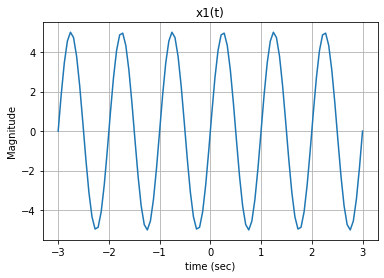

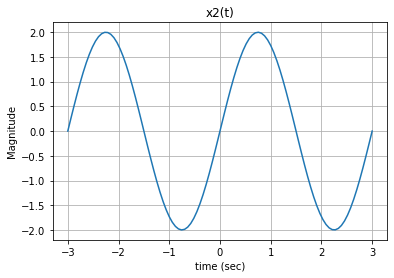

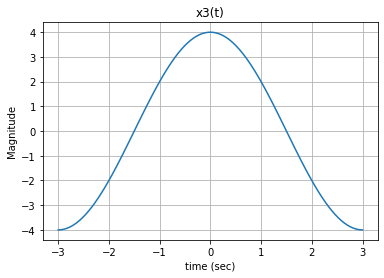

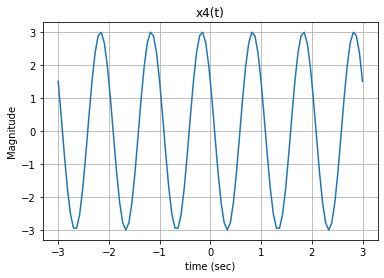

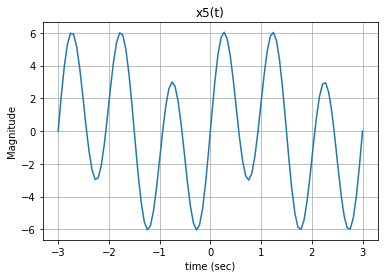

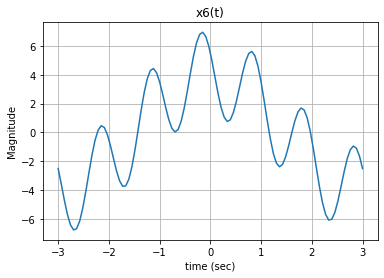

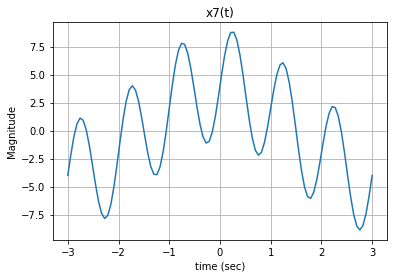

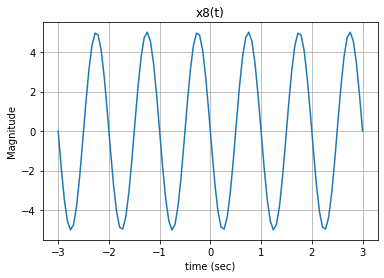

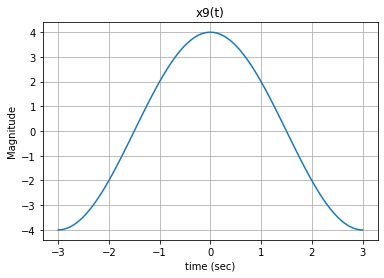

In [113]:
# Part C: Sinusoids

t = np.linspace(-3, 3, 100)
x = [0,5*np.sin(2*pi*t),2*np.sin((2*pi/3)*t),4*np.cos((pi/3)*t),3*np.cos((2*pi*t)+pi/3),(5*np.sin(2*pi*t) + 2*np.sin((2*pi/3)*t)),(4*np.cos((pi/3)*t)+3*np.cos((2*pi*t)+pi/3)),(5*np.sin(2*pi*t)+4*np.cos((pi/3)*t)),5*np.sin(2*pi*(-t)),4*np.cos((pi/3)*(-t))]

for i in range(1,10):
    plt.figure(i)
    plt.xlabel("time (sec)")
    plt.ylabel("Magnitude")
    plt.grid("on")
    plt.title("x%d(t)" %(i))
    plt.plot(t,x[i])

plt.show()

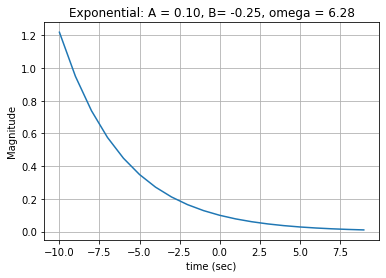

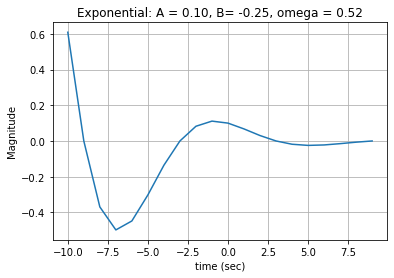

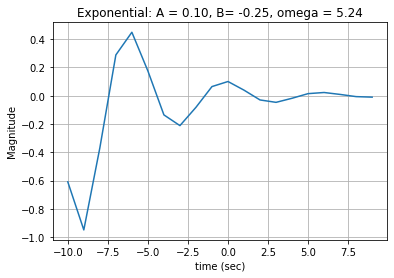

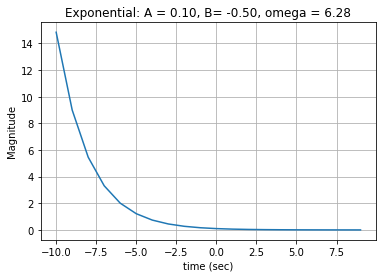

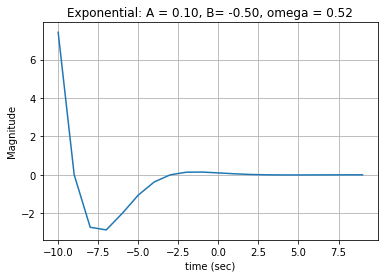

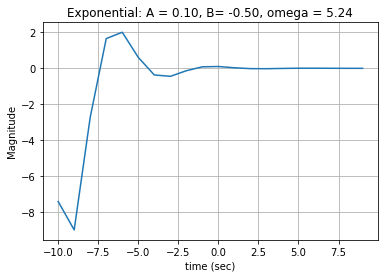

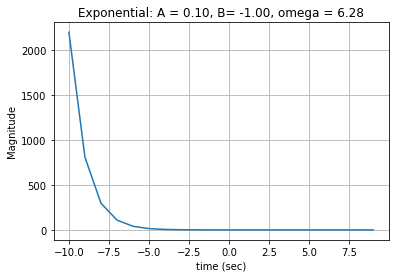

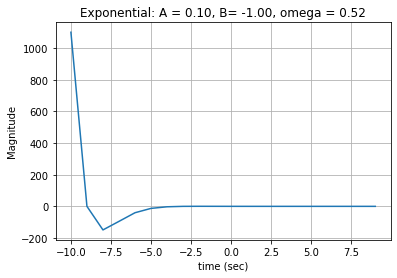

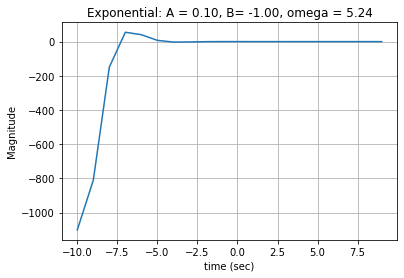

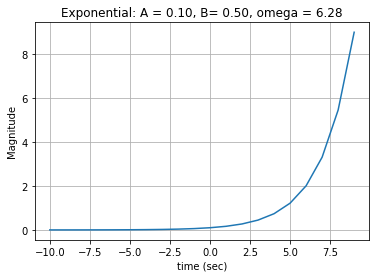

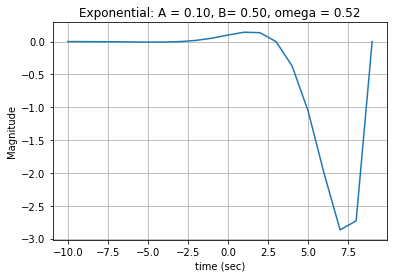

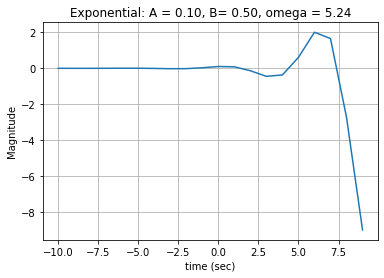

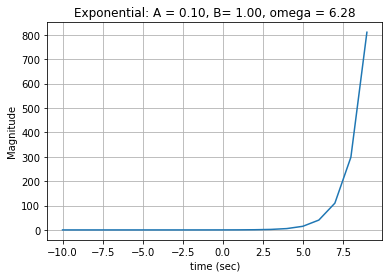

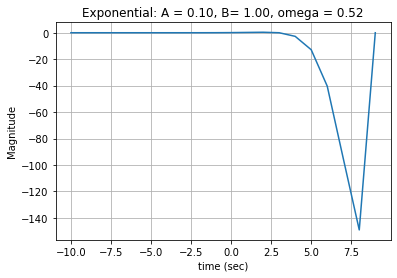

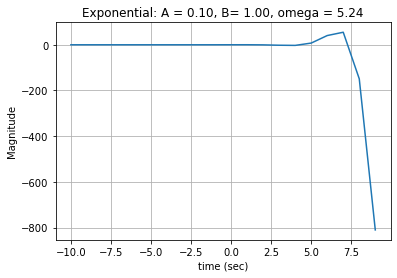

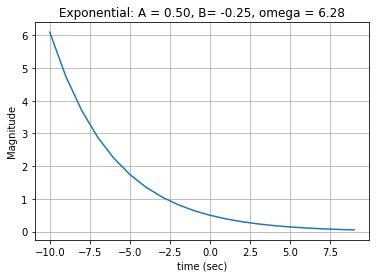

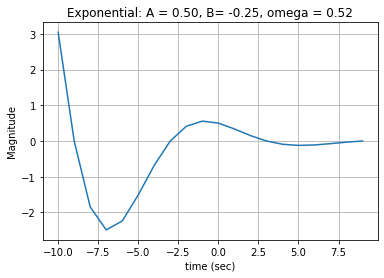

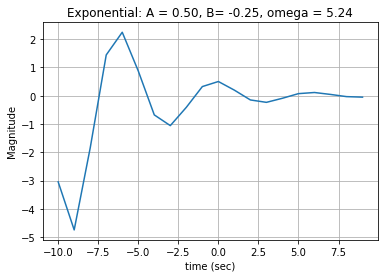

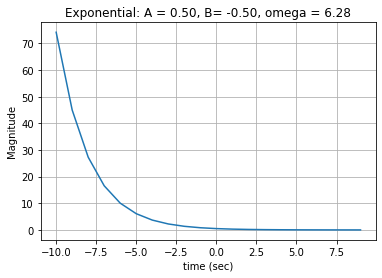

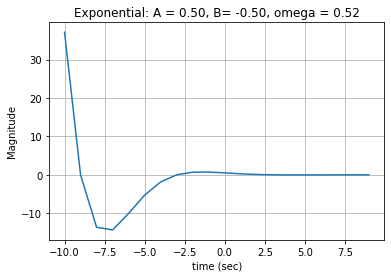

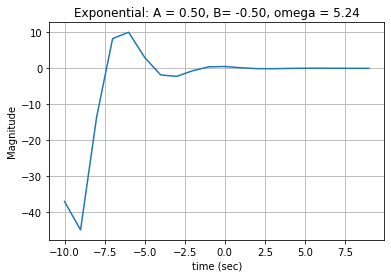

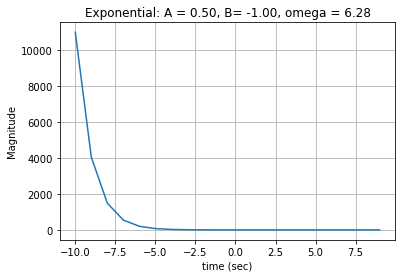

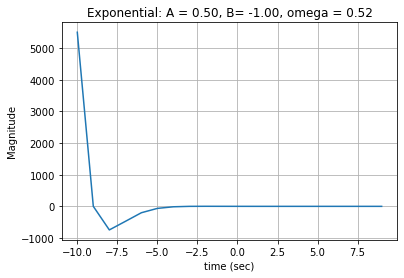

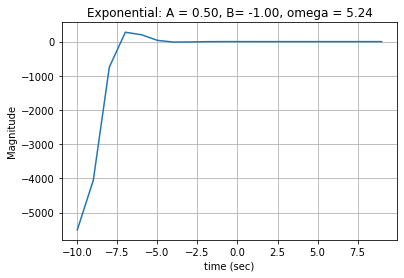

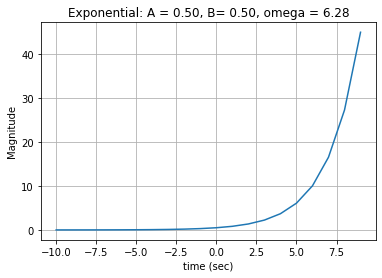

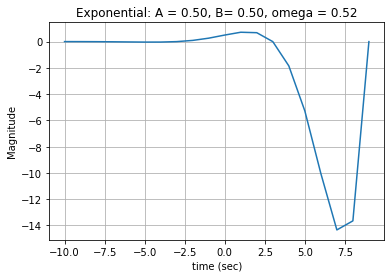

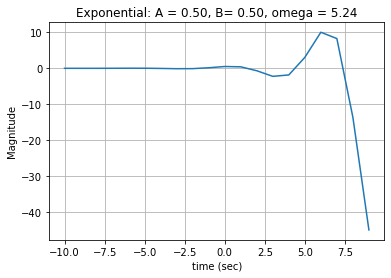

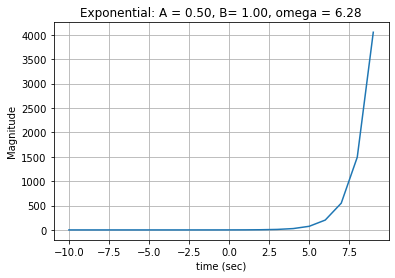

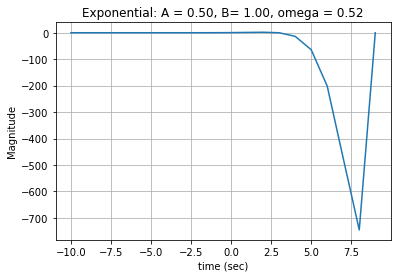

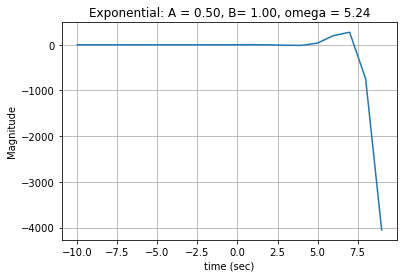

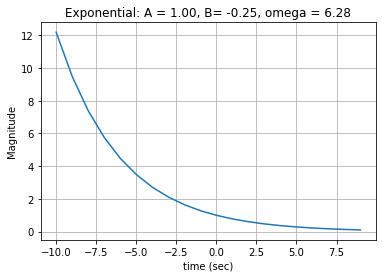

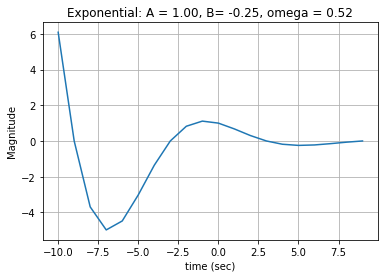

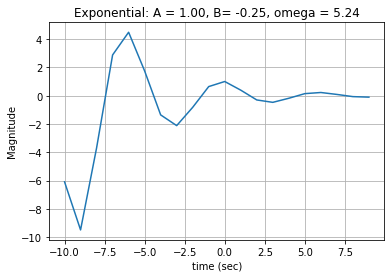

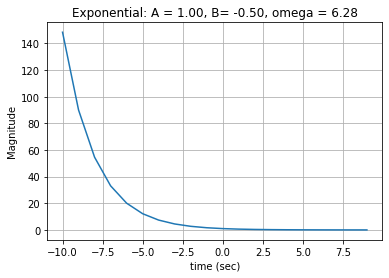

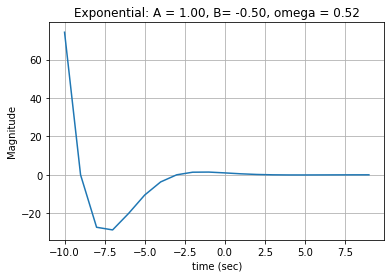

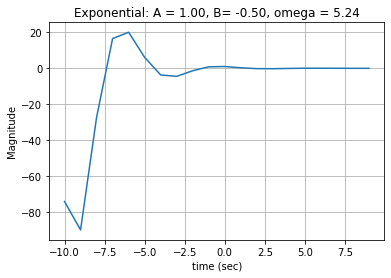

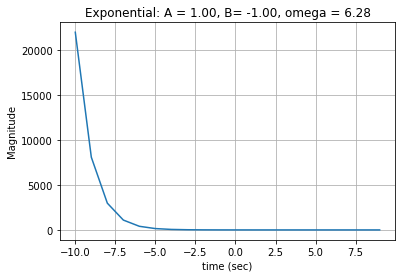

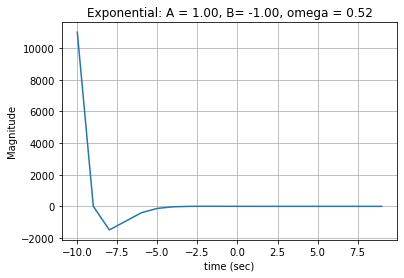

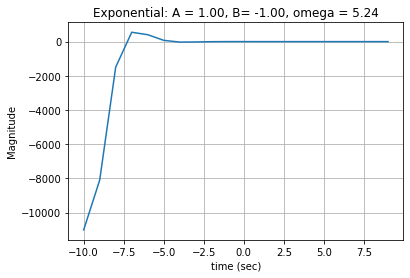

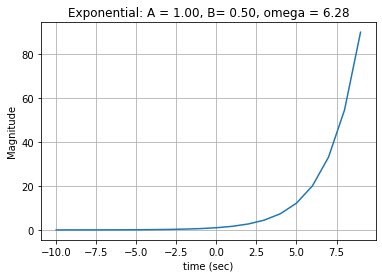

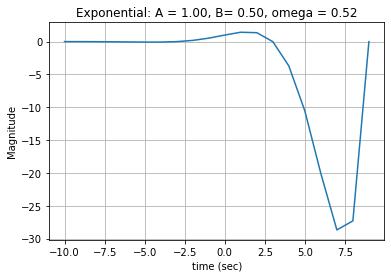

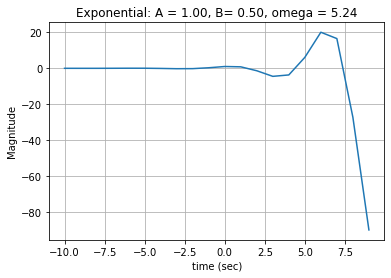

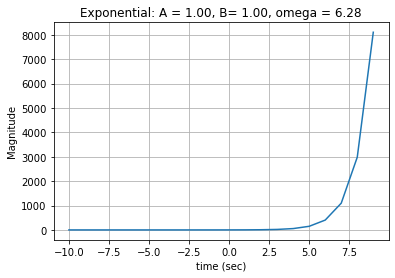

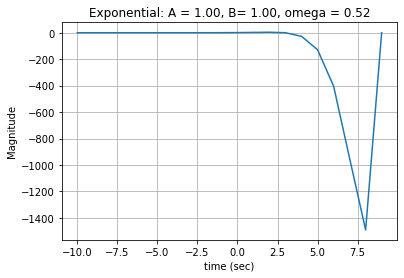

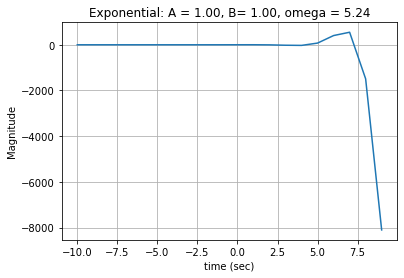

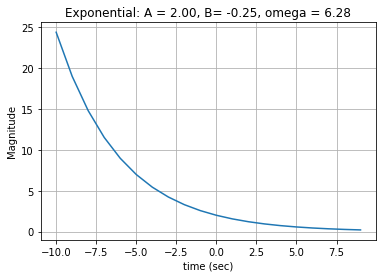

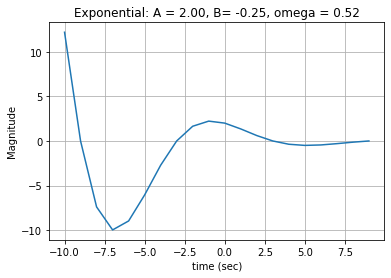

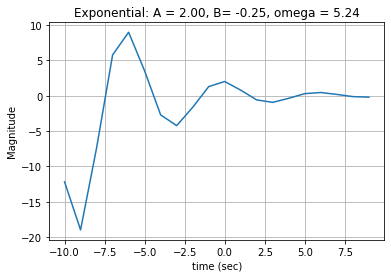

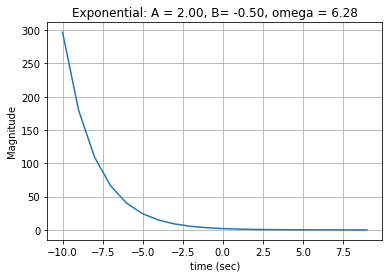

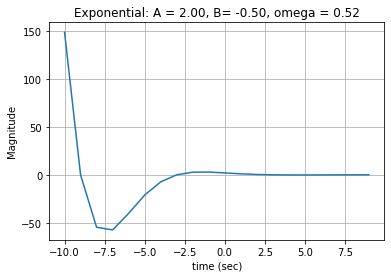

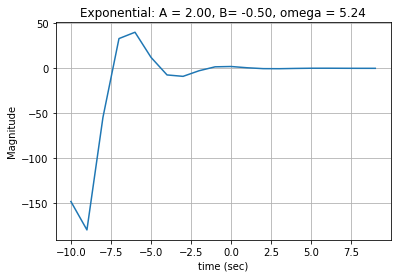

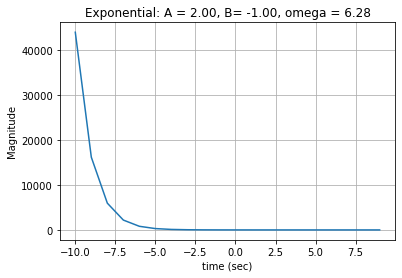

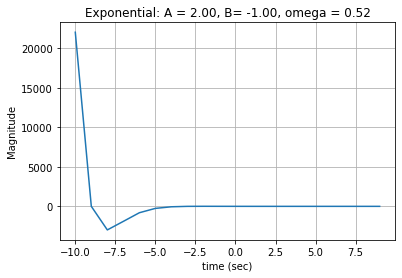

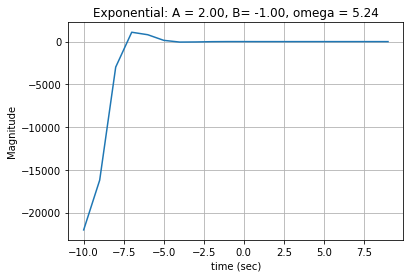

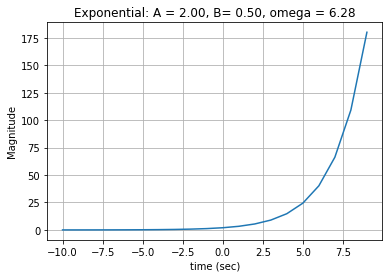

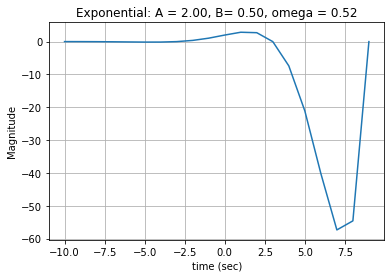

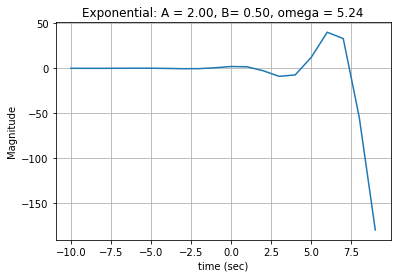

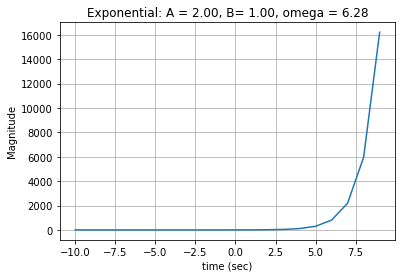

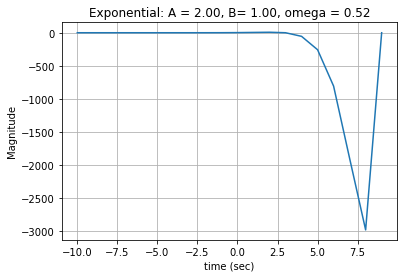

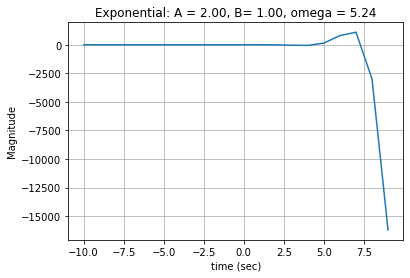

In [635]:
# Part D: Exponential-sinosoids

t = np.arange(-10,10)
A = [0.1,0.5,1,2]
B = [-0.25,-0.5,-1,0.5,1]
O = [2*pi,pi/6,5*pi/3]
i = 0
for a in A:
    for b in B:
        for omega in O:
            plt.figure(i+1)
            plt.xlabel("time (sec)")
            plt.ylabel("Magnitude")
            plt.title("Exponential: A = %0.2f, B= %0.2f, omega = %0.2f" %(a,b,omega))
            plt.plot(t,a*np.exp(b*t)*np.cos(omega*t))
            plt.grid("on")
            plt.show()
        i += 1

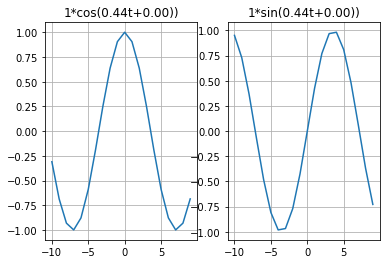

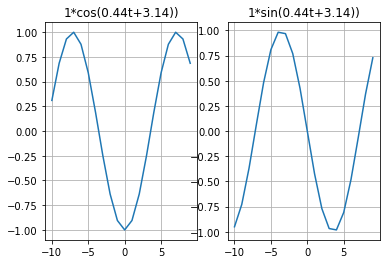

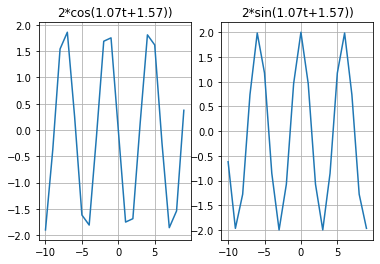

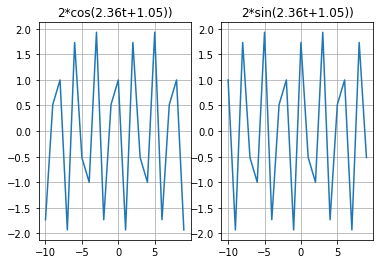

In [638]:
# Part E: Complex exponentials
t = np.arange(-10,10)

A = [1,1,2,2]
omega = [0.14*pi,0.14*pi,0.34*pi,0.75*pi]
theta = [0,pi,0.5*pi,pi/3]
for i in range(4):
    plt.figure(i+1)
    plt.subplot(1,2,1)
    plt.grid("on")
    plt.plot(t,A[i]*np.cos(omega[i]*t + theta[i]))
    plt.title("%d*cos(%0.2ft+%0.2f))" %(A[i],omega[i],theta[i]))
    plt.subplot(1,2,2)
    plt.grid("on")
    plt.plot(t,A[i]*np.sin(omega[i]*t + theta[i]))
    plt.title("%d*sin(%0.2ft+%0.2f))" %(A[i],omega[i],theta[i]))

<ipython-input-621-ae5b24d39ea3>:52: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0,max(y)*1.1)


<StemContainer object of 3 artists>

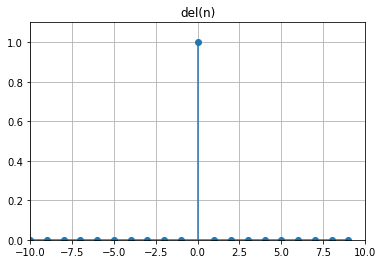

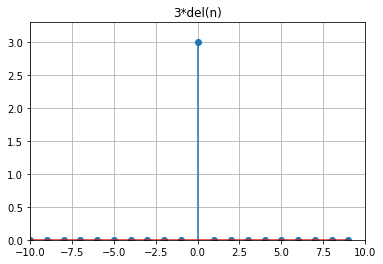

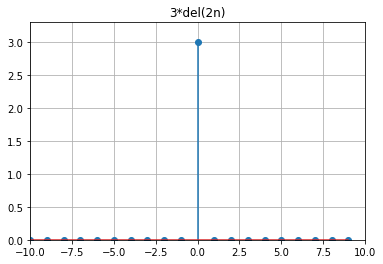

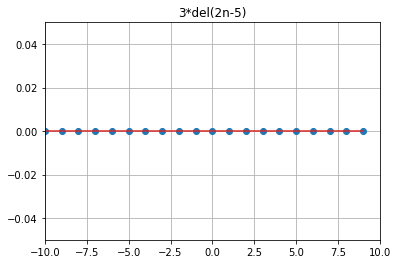

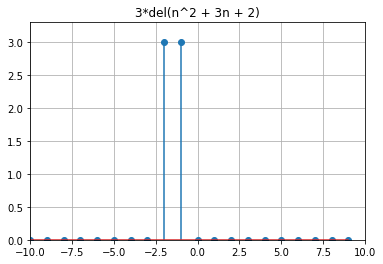

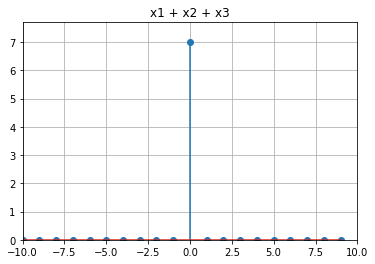

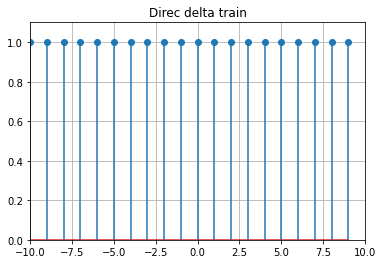

In [621]:
# Part F: Discrete signals

x = list(np.arange(-10,10,1))

def des_impulse(a,g):
    sol = []
    for n in x:
        if eval(g) == 0:
            sol.append(n)
    for n in sol:
        i = np.where(x==n)
        y[i] += a
    return 0

plt.figure(1)
y = np.zeros(len(x))
des_impulse(1,"n")
plt.title("del(n)")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

plt.figure(2)
y = np.zeros(len(x))
des_impulse(3,"n")
plt.title("3*del(n)")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

plt.figure(3)
y = np.zeros(len(x))
des_impulse(3,"2*n")
plt.title("3*del(2n)")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

plt.figure(4)
y = np.zeros(len(x))
des_impulse(3,"2*n-5")
plt.title("3*del(2n-5)")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

plt.figure(5)
y = np.zeros(len(x))
des_impulse(3,"n**2 + 3*n + 2")
plt.title("3*del(n^2 + 3n + 2)")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

plt.figure(6)
y = np.zeros(len(x))
des_impulse(1,"n")+des_impulse(3,"n")+des_impulse(3,"2*n")
plt.title("x1 + x2 + x3")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

plt.figure(7)
y = np.zeros(len(x))
for i in x:
    des_impulse(1,"n-i")
plt.title("Direc delta train")
plt.grid("on")
plt.axis("on")
plt.xlim(-10,10)
plt.ylim(0,max(y)*1.1)
plt.stem(x,y)

<StemContainer object of 3 artists>

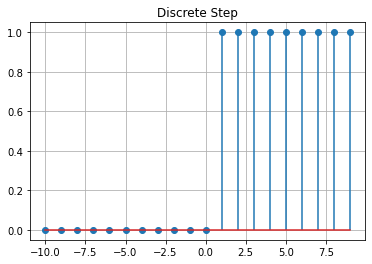

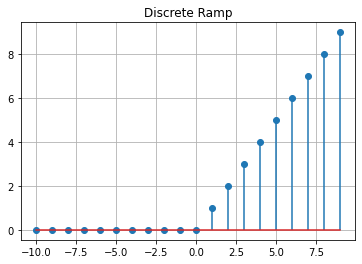

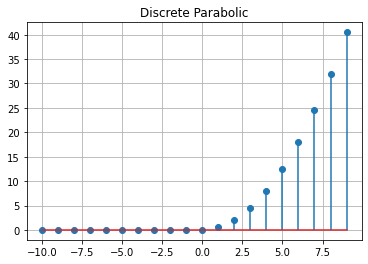

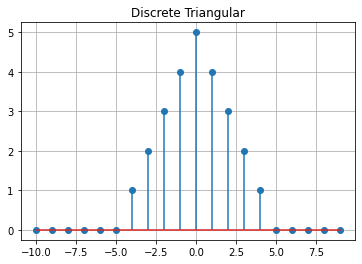

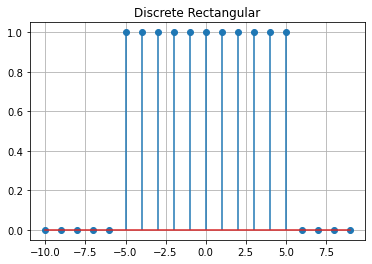

In [590]:
# Part-A in discrete domain

t1 = np.arange(-10,10)  

figure(1)
y = step(t1)
plt.grid("on")
plt.title("Discrete Step")
plt.stem(t1,y)

figure(2)
y = ramp(t1)
plt.grid("on")
plt.title("Discrete Ramp")
plt.stem(t1,y)

figure(3)
y = parabolic(t1)
plt.grid("on")
plt.title("Discrete Parabolic")
plt.stem(t1,y)

figure(4)
y = tri(t1,10)
plt.grid("on")
plt.title("Discrete Triangular")
plt.stem(t1,y)

figure(5)
y = rect(t1,10)
plt.grid("on")
plt.title("Discrete Rectangular")
plt.stem(t1,y)

In [675]:
# Part G: Convolution

def convolution(x,h):
    
    N = len(x) + len(h) - 1
    y = np.zeros((len(h),len(x)))
    Y = np.zeros(len(x) + len(h) - 1)
    for i in range(len(h)):
        for j in range(len(x)):
            y[i][j] = x[j]*h[i]
    
    for index in range(N):
        for i in range(len(h)):
            for j in range(len(x)):
                if i + j == index:
                    Y[index] += y[i][j]
    print(Y)
                    
x = np.array([2,4,5,2,7])
h = np.array([8,-5,4])
convolution(x,h)
    

[ 16.  22.  28.   7.  66. -27.  28.]


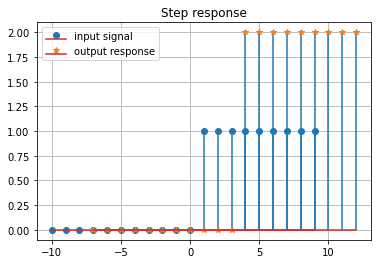

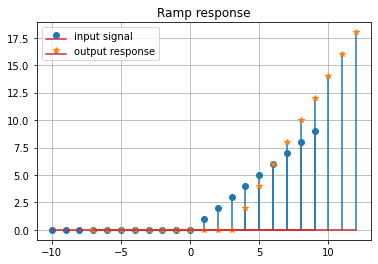

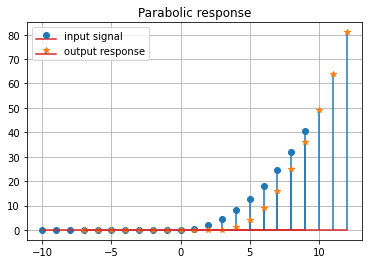

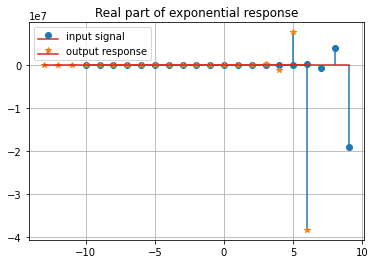

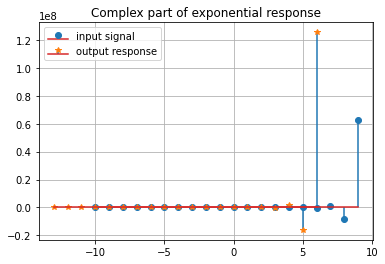

In [668]:
# Impulse response of the system is h[n] = 2*del(n-3)

t = np.arange(-10,10)
real = np.exp(2*t)*np.cos(3*t)
imag = np.exp(2*t)*np.sin(3*t)

plt.figure(1)
plt.title("Step response") # Step response of the system is y[n] = 2*u[n-3]
plt.grid("on")
y = step(t)
plt.stem(t,y,markerfmt='o',label = "input signal")
y1,t1 = modify(y,t,2,1,-3,0)
plt.stem(t1,y1,markerfmt='*',label = "output response")
plt.legend()
plt.show()

plt.figure(2)
plt.title("Ramp response") # ramp response of the system is y[n] = 2*r[n-3]
plt.grid("on")
y = ramp(t)
plt.stem(t,y,markerfmt='o',label = "input signal")
y1,t1 = modify(y,t,2,1,-3,0)
plt.stem(t1,y1,markerfmt='*',label = "output response") 
plt.legend()
plt.show()

plt.figure(3)
plt.title("Parabolic response") # Parabolic response of the system is y[n] = 2*p[n-3]
plt.grid("on")
y = parabolic(t)
plt.stem(t,y,markerfmt='o',label = "input signal")
y1,t1 = modify(y,t,2,1,-3,0)
plt.stem(t1,y1,markerfmt='*',label = "output response")
plt.legend()
plt.show()

plt.figure(4)
plt.title("Real part of exponential response")
plt.grid("on")
plt.stem(t,real,markerfmt='o',label = "input signal")
plt.stem(t-3,2*real,markerfmt='*',label = "output response")
plt.legend()
plt.show()

plt.figure(5)
plt.title("Complex part of exponential response")
plt.grid("on")
plt.stem(t,imag,markerfmt='o',label = "input signal")
plt.stem(t-3,2*imag,markerfmt='*',label = "output response")
plt.legend()
plt.show()